[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.2.1 Szenarien Überblick

In [72]:
%matplotlib inline
import pandas as pd
from importlib import reload

#FLUCCOplus
import utils
import scenarios



In [73]:
sc_raw = pd.read_excel("../data/szenarien/szenarien_w2s.xlsx",
                   sheet_name="scenarios",
                   index_col=0, skiprows=range(1,3))


C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [74]:
reload(scenarios)

sc = (sc_raw
        .pipe(scenarios.start_pipeline)
        .pipe(scenarios.NaNtoZero)
        .pipe(scenarios.format_df)
        .pipe(scenarios.convert_PJ_to_GWH)
 )

start_pipeline took 0:00:00
NaNtoZero took 0:00:00
format_df took 0:00:00.005837
convert_PJ_to_GWH took 0:00:00.002204


,Jahr,Strombedarf,Mismatch,Importe,Stromproduktion,Wasserkraft,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik,Volatile EE,Nicht-Volatile,RES0,RES1,RES2
Szenario [GWh/a],,,,,,,,,,,,,,,
Erneuerbare Energie 2050 (UBA16),2050,78722.228520,0.0,-19722.2238,98444.452320,45277.781400,4980.555954,40297.225446,21083.335020,23555.557440,84936.117906,8527.778460,-6213.889386,-11194.445340,-1.972222e+04
WEM 2050 (UBA17),2050,88554.173751,0.0,10833.3342,77720.839551,43599.447932,4795.939273,38803.508660,7606.667275,17200.556932,63610.732867,9314.167412,24943.440884,20147.501612,1.083333e+04
Transition 2050 (UBA17),2050,115805.564820,0.0,0.0000,115805.564820,47005.003760,5170.550414,41834.453347,28350.002268,26456.668783,96641.124398,13993.890008,19164.440422,13993.890008,2.368476e-11
100% Erneuerbare Deckung 2050 (FLUCCO+),2050,87365.020938,0.0,0.0000,87365.020938,33886.183416,3727.480176,30158.703241,23891.611013,27641.311637,81691.625890,1945.914872,5673.395048,1945.914872,1.036208e-11
100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+),2050,116723.788045,0.0,0.0000,116723.788045,49163.070888,5407.937798,43755.133090,30238.326513,35376.805146,109370.264749,1945.585499,7353.523296,1945.585499,4.934325e-12


### Endenergie Erzeugung nach Energieträgern

In [75]:
sc.columns

all = ['Jahr', 'Strombedarf', 'Mismatch', 'Importe', 'Stromproduktion',
       'Wasserkraft', 'Windkraft', 'Photovoltaik', 'Volatile EE',
       'Nicht-Volatile', 'Laufkraft', 'Pumpspeicher', 'RES0', 'RES1', 'RES2']

pp_carriers = ['Laufkraft','Windkraft', 'Photovoltaik', 'Pumpspeicher', 'Nicht-Volatile']

[Text(0, 0.5, 'Endenergie [GWh/a]')]

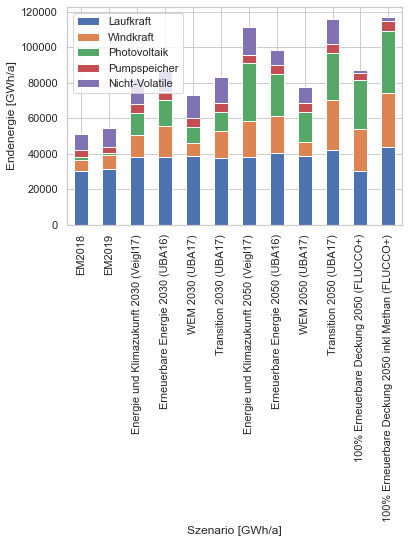

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook")

fig, ax = plt.subplots(1,1)

sc[pp_carriers].plot(kind="bar", stacked=True, rot=90, ax=ax)
ax.set(ylabel="Endenergie [GWh/a]")

### Anteil Erneuerbarer Stromerzeugung am Endenergiemix

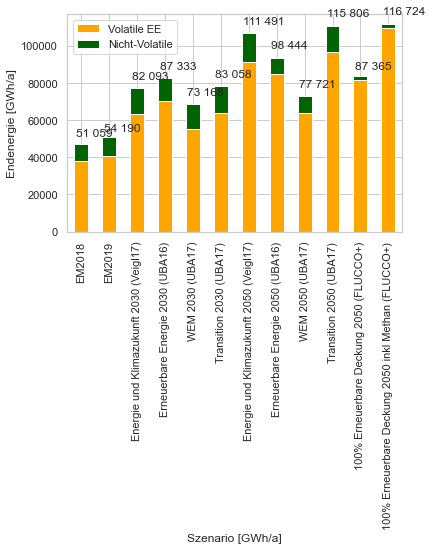

In [88]:
fig, ax = plt.subplots(1,1)
sc[["Volatile EE", "Nicht-Volatile"]].plot(ax=ax,kind="bar", stacked=True, color=["orange", "darkgreen"])
ax.set(ylabel="Endenergie [GWh/a]")
for i, label in enumerate(list(sc.index)):
    score = sc.loc[label, "Stromproduktion"]
    ax.annotate(f"{f'{score:,.0f}'.replace(',',' ')}", (i - 0.2, score))

 Ermittlung der Jahres-Skalierungsfaktoren

Prinzipiell können natürlich alle Szenarien als Skalierungsgröße verwendet werden. Unser Szenario-Letztstand,
der auf der [EnInnov 2020 Graz](https://www.tugraz.at/events/eninnov2020/nachlese/download-beitraege/stream-a/)
 vorgestellt wurde, ist die Variante "Streicher 2b". Das entspricht dem ursprünglichen Szenario [Streicher, et al. 2011] mit folgenden
 Adaptionen:
 * Reallokation der Energie aus Geothermie zu jeweils 50/50 auf Windkraft/PV, Methanisierung nur auf Windkraft (Streicher 2a)
 * Endenergiebedarf der Mobilität aus UBA17  herangezogen, Landwirtschaft ergänzt